# STEP 2: Exploratory Data Analysis of Raw Results

This script performs an initial analysis of the raw results, focusing on
metadata (duration, size, tokens) to extract preliminary insights before
the formal quality evaluation.

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# Load the raw results file generated in Step 1
RAW_DATA_FILE = 'raw_results.csv'

In [70]:
df = pd.read_csv(RAW_DATA_FILE)
print(f"File '{RAW_DATA_FILE}' loaded. Total of {len(df)} samples")

File 'raw_results.csv' loaded. Total of 9600 samples


In [71]:
# Basic cleaning: remove rows where the response was not generated
df.dropna(subset=['response'], inplace=True)
df['response_length'] = df['response'].str.len()
print("Column 'response_length' (response size) calculated.")
print(f'Total of {len(df)} samples')

Column 'response_length' (response size) calculated.
Total of 9600 samples


## Analysis 1: Verbosity (Tokens)

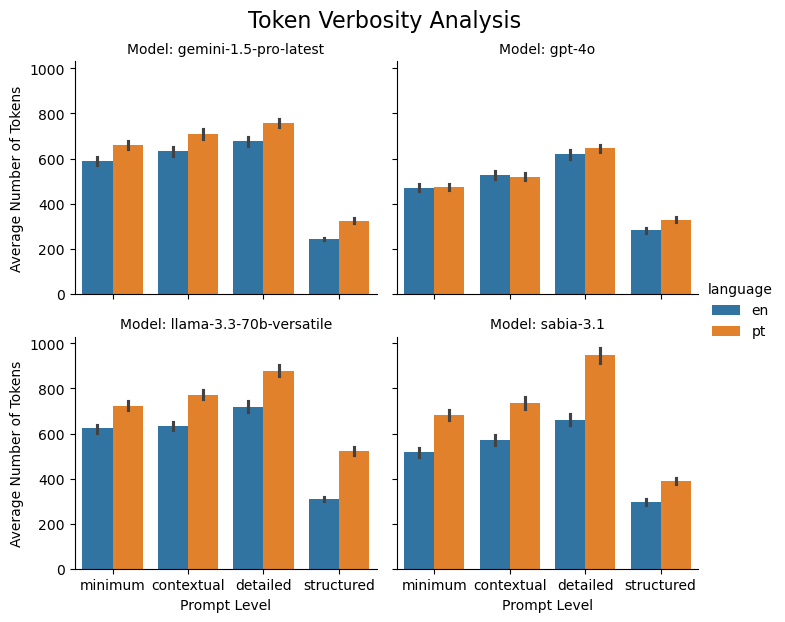

In [72]:
g_token = sns.catplot(
    data=df,
    x='prompt_level',
    y='total_tokens',
    hue='language',
    col='model',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2
)
g_token.fig.suptitle('Token Verbosity Analysis', y=1.03, fontsize=16)
g_token.set_axis_labels("Prompt Level", "Average Number of Tokens")
g_token.set_titles("Model: {col_name}")
plt.show()


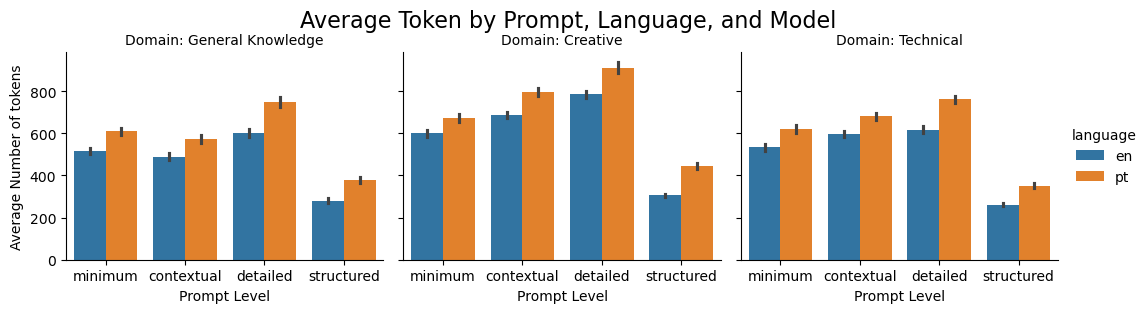

In [73]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='total_tokens',
    hue='language',
    col='domain',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=3,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Token by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of tokens")
g.set_titles("Domain: {col_name}")
plt.show()

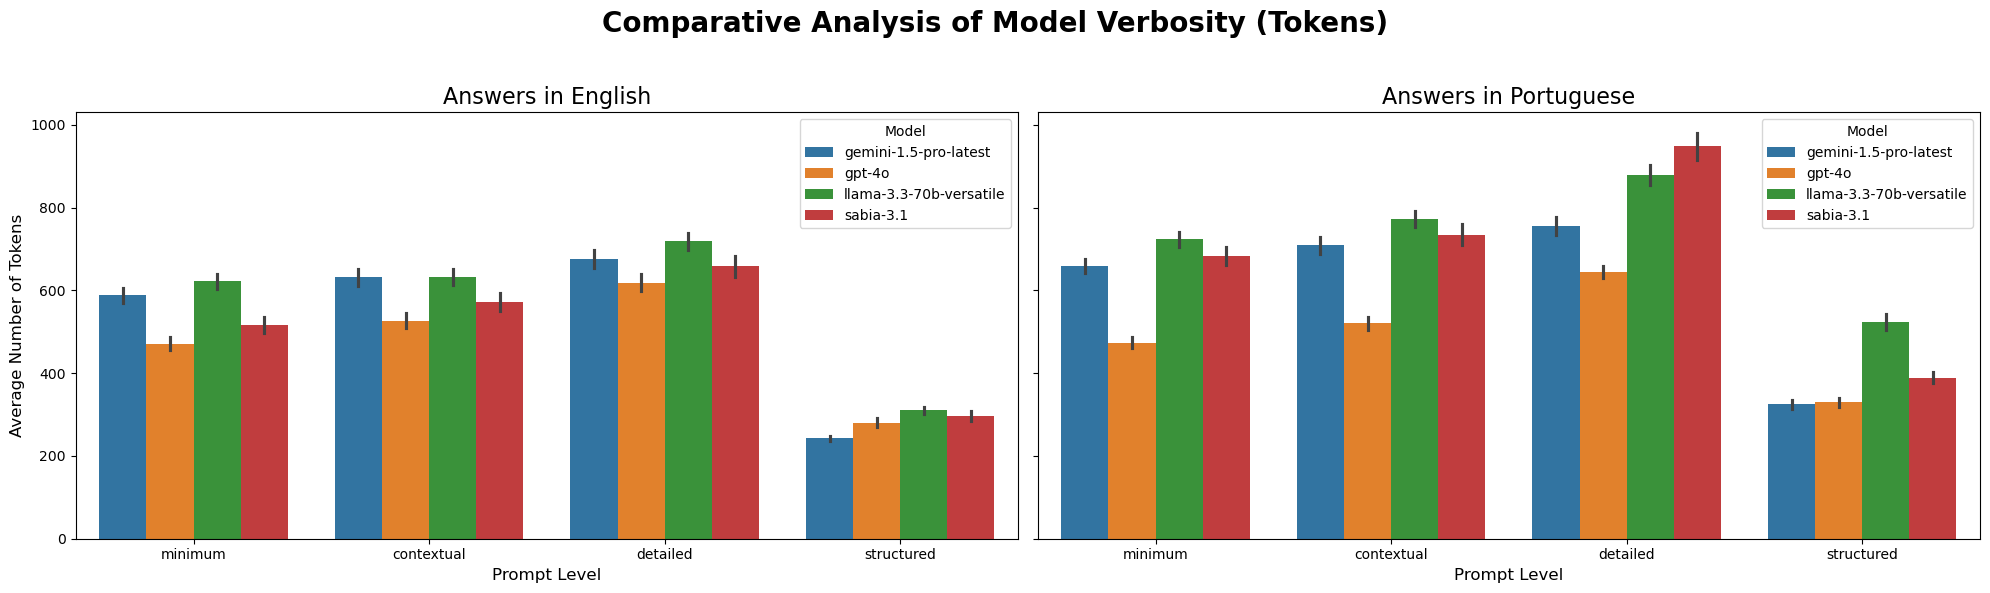

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
fig.suptitle('Comparative Analysis of Model Verbosity (Tokens)', fontsize=20, fontweight='bold')

sns.barplot(
    data=df[df['language'] == 'en'],
    x='prompt_level',
    y='total_tokens',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[0]
)
axes[0].set_title('Answers in English', fontsize=16)
axes[0].set_xlabel('Prompt Level', fontsize=12)
axes[0].set_ylabel('Average Number of Tokens', fontsize=12)
axes[0].legend(title='Model')

sns.barplot(
    data=df[df['language'] == 'pt'],
    x='prompt_level',
    y='total_tokens',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[1]
)
axes[1].set_title('Answers in Portuguese', fontsize=16)
axes[1].set_xlabel('Prompt Level', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend(title='Model')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Analysis 2: Verbosity (Characters)

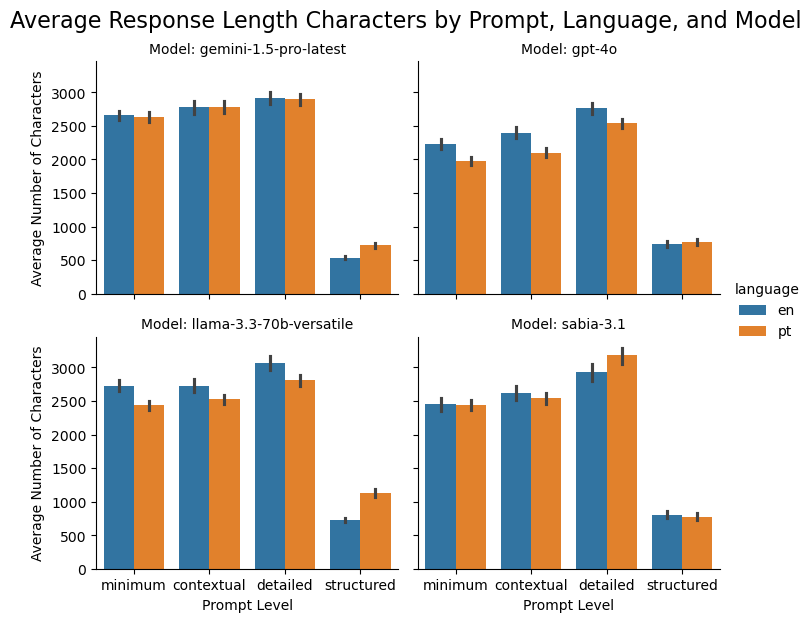

In [75]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='response_length',
    hue='language',
    col='model',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Response Length Characters by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of Characters")
g.set_titles("Model: {col_name}")
plt.show()

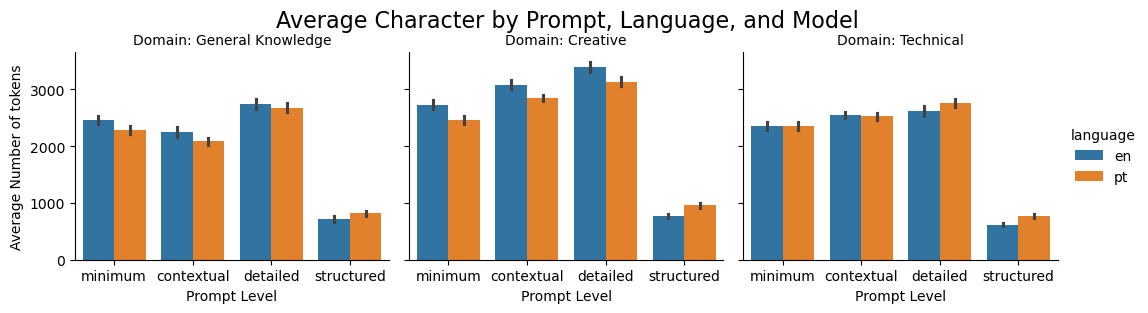

In [81]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='response_length',
    hue='language',
    col='domain',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=3,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Character by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of tokens")
g.set_titles("Domain: {col_name}")
plt.show()

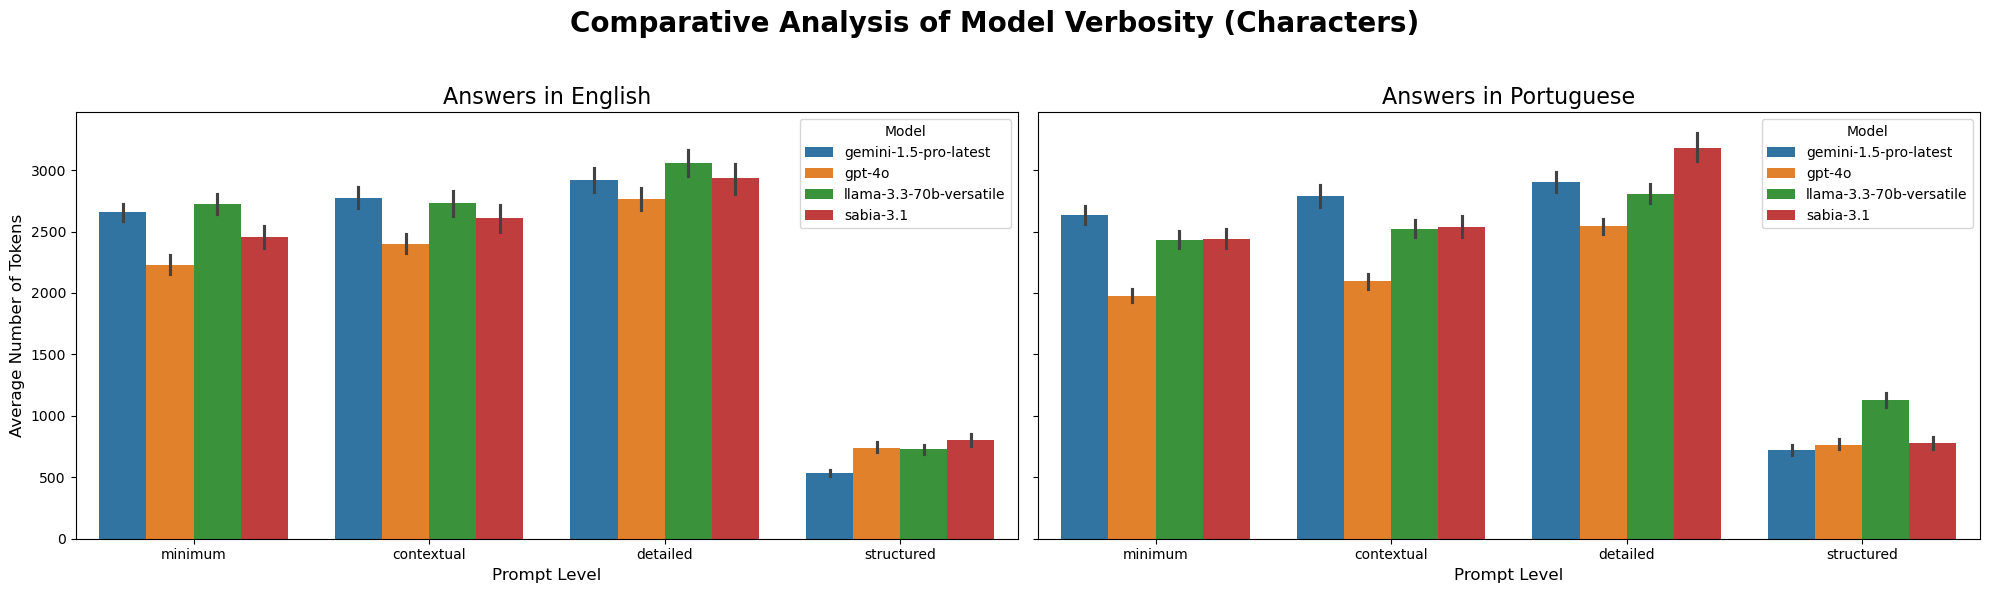

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
fig.suptitle('Comparative Analysis of Model Verbosity (Characters)', fontsize=20, fontweight='bold')

sns.barplot(
    data=df[df['language'] == 'en'],
    x='prompt_level',
    y='response_length',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[0]
)
axes[0].set_title('Answers in English', fontsize=16)
axes[0].set_xlabel('Prompt Level', fontsize=12)
axes[0].set_ylabel('Average Number of Tokens', fontsize=12)
axes[0].legend(title='Model')

sns.barplot(
    data=df[df['language'] == 'pt'],
    x='prompt_level',
    y='response_length',
    hue='model',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    ax=axes[1]
)
axes[1].set_title('Answers in Portuguese', fontsize=16)
axes[1].set_xlabel('Prompt Level', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend(title='Model')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Insight Preliminar:** A forma como a verbosidade varia entre os idiomas é uma característica de cada modelo. O gemini-1.5-pro e o llama-3.3-70b mostram as maiores discrepâncias, com ambos a gerar respostas mais longas em português. Já o gpt-4o e o sabia-3.1 são mais equilibrados, gerando respostas de comprimento muito semelhante em ambos os idiomas.

* As respostas estruturadas, apesar de serem significativamente mais curtas, têm uma qualidade (precisão, completude) maior do que as respostas detalhadas, que são mais longas?

* A maior verbosidade em certos modelos traduz-se em maior qualidade ou apenas em mais texto para transmitir a mesma informação?

* O domínio Criativo, que gera as respostas mais longas, também produz as respostas de maior qualidade, ou a sua natureza aberta leva a mais erros?

* Existe uma correlação direta entre o custo em tokens de uma resposta e a sua nota de qualidade final?

## Analysis 3: Latency and Reliability Metrics

In [78]:
latency_metrics = df.groupby(['model', 'language']).agg(
    median_duration=('duration_s', 'median'),
    iqr_duration=('duration_s', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    p95_duration=('duration_s', lambda x: x.quantile(0.95))
).reset_index()

print("Detailed Latency Metrics by Model and Language:")
display(latency_metrics.round(2))

Detailed Latency Metrics by Model and Language:


,model,language,median_duration,iqr_duration,p95_duration
0,gemini-1.5-pro-latest,en,10.77,8.49,15.85
1,gemini-1.5-pro-latest,pt,12.46,7.75,18.34
2,gpt-4o,en,5.79,4.26,12.72
3,gpt-4o,pt,6.16,4.16,12.16
4,llama-3.3-70b-versatile,en,1.50,0.99,2.76
5,llama-3.3-70b-versatile,pt,1.99,0.95,3.24
6,sabia-3.1,en,8.58,6.80,18.37
7,sabia-3.1,pt,11.44,9.32,22.78


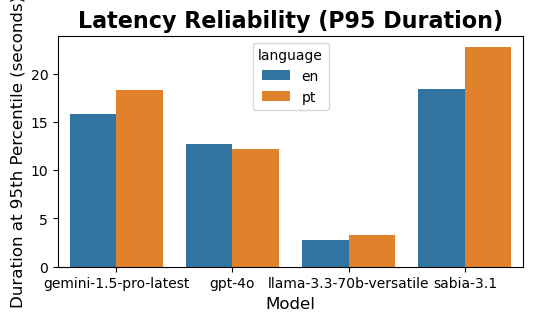

In [79]:
plt.figure(figsize=(6, 3))
sns.barplot(
data=latency_metrics,
x='model',
y='p95_duration',
hue='language',
)
plt.title('Latency Reliability (P95 Duration)', fontsize=16, fontweight='bold')
plt.ylabel('Duration at 95th Percentile (seconds)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

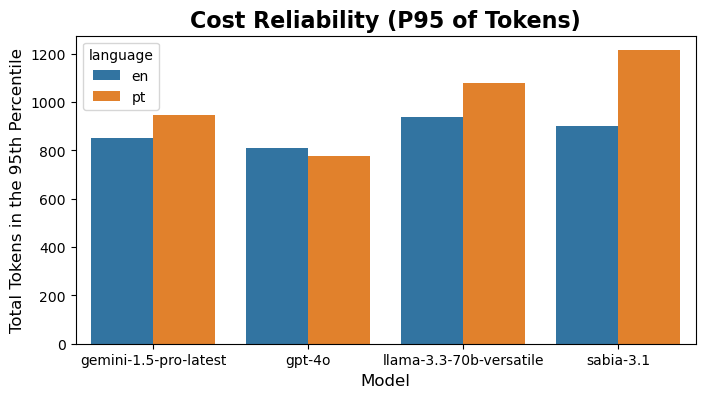

In [87]:
cost_p95 = df.groupby(['model', 'language'])['total_tokens'].quantile(0.95).reset_index()
cost_p95 = cost_p95.rename(columns={'total_tokens': 'p95_tokens'})

plt.figure(figsize=(8, 4))
sns.barplot(
    data=cost_p95,
    x='model',
    y='p95_tokens',
    hue='language',
)
plt.title('Cost Reliability (P95 of Tokens)', fontsize=16, fontweight='bold')
plt.ylabel('Total Tokens in the 95th Percentile', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()